# Analyza vetru

Abych si usetril cas, tak koukam na notebook pouzity pro analyzu dat ze simulace - https://github.com/martin-majlis/ms-opendata-simulation/blob/master/Analysis.ipynb

In [4]:
# import balicku
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
# nactu predpripravena data
data_raw = pd.read_csv('anemometr_sensor.csv')

In [10]:
# podivam se, jake sloupce jsou dostupne
data_raw.columns

Index(['TS', 'TS_H', '0004A30B001EF8A4-Battery', '0004A30B001EF8A4-Channel',
       '0004A30B001EF8A4-LrrRSSI', '0004A30B001EF8A4-LrrSNR',
       '0004A30B001EF8A4-Packet_type', '0004A30B001EF8A4-RSSI',
       '0004A30B001EF8A4-SNR', '0004A30B001EF8A4-SpFact',
       '0004A30B001EF8A4-SubBand', '0004A30B001EF8A4-Timestamp',
       '0004A30B001EF8A4-Wind_Direction', '0004A30B001EF8A4-Wind_Speed',
       '0004A30B001F856E-Battery', '0004A30B001F856E-Channel',
       '0004A30B001F856E-LrrRSSI', '0004A30B001F856E-LrrSNR',
       '0004A30B001F856E-Packet_type', '0004A30B001F856E-RSSI',
       '0004A30B001F856E-SNR', '0004A30B001F856E-SpFact',
       '0004A30B001F856E-SubBand', '0004A30B001F856E-Timestamp',
       '0004A30B001F856E-Wind_Direction', '0004A30B001F856E-Wind_Speed',
       'TS.1'],
      dtype='object')

In [11]:
# a jakych hodnot asi tak nabyvaji
data_raw.describe()

,TS,0004A30B001EF8A4-Battery,0004A30B001EF8A4-Channel,0004A30B001EF8A4-LrrRSSI,0004A30B001EF8A4-LrrSNR,0004A30B001EF8A4-Packet_type,0004A30B001EF8A4-RSSI,0004A30B001EF8A4-SNR,0004A30B001EF8A4-SubBand,0004A30B001EF8A4-Wind_Direction,...,0004A30B001F856E-Channel,0004A30B001F856E-LrrRSSI,0004A30B001F856E-LrrSNR,0004A30B001F856E-Packet_type,0004A30B001F856E-RSSI,0004A30B001F856E-SNR,0004A30B001F856E-SubBand,0004A30B001F856E-Wind_Direction,0004A30B001F856E-Wind_Speed,TS.1
count,8.050000e+02,721.000000,7.210000e+02,721.000000,721.000000,721.0,0.0,721.000000,0.0,721.000000,...,5.990000e+02,599.000000,599.000000,599.0,0.0,599.000000,0.0,599.000000,599.000000,8.050000e+02
mean,1.510023e+09,3.461516,8.679372e+08,-110.780860,-5.021775,9.0,NaN,-8.285714,NaN,221.723301,...,8.680125e+08,-113.230384,-9.472454,9.0,NaN,-12.176962,NaN,192.771285,16.342137,1.510023e+09
std,2.353400e+05,0.023593,4.534495e+05,10.070127,8.834158,0.0,NaN,7.504919,NaN,69.873423,...,3.913276e+05,8.764687,8.007801,0.0,NaN,7.808027,NaN,89.268086,80.183676,2.353400e+05
min,1.509632e+09,3.406000,8.671000e+08,-124.000000,-20.200000,9.0,NaN,-22.000000,NaN,0.000000,...,8.671000e+08,-121.000000,-20.500000,9.0,NaN,-22.000000,NaN,0.000000,1.440000,1.509632e+09
25%,1.509817e+09,3.452000,8.677000e+08,-118.000000,-11.500000,9.0,NaN,-16.000000,NaN,180.000000,...,8.679000e+08,-118.000000,-17.000000,9.0,NaN,-20.000000,NaN,135.000000,1.440000,1.509817e+09
50%,1.510036e+09,3.460000,8.681000e+08,-115.000000,-7.800000,9.0,NaN,-7.000000,NaN,247.500000,...,8.681000e+08,-115.000000,-10.500000,9.0,NaN,-13.000000,NaN,180.000000,1.440000,1.510036e+09
75%,1.510218e+09,3.481000,8.683000e+08,-108.000000,2.200000,9.0,NaN,-3.000000,NaN,270.000000,...,8.683000e+08,-113.000000,-3.100000,9.0,NaN,-5.000000,NaN,270.000000,1.440000,1.510218e+09
max,1.510496e+09,3.498000,8.685000e+08,-83.000000,13.500000,9.0,NaN,7.000000,NaN,337.500000,...,8.685000e+08,-74.000000,10.200000,9.0,NaN,7.000000,NaN,337.500000,646.080000,1.510496e+09


In [12]:
# Ted si vyberu sloupecky, ktere vypadaji uzitecne
COLUMNS_WIND = [
    'TS', 
    '0004A30B001EF8A4-Wind_Direction', 
    '0004A30B001EF8A4-Wind_Speed',  
    '0004A30B001F856E-Wind_Speed', 
    '0004A30B001F856E-Wind_Direction'
]
data_wind = data_raw[COLUMNS_WIND]
data_wind.describe()

,TS,0004A30B001EF8A4-Wind_Direction,0004A30B001EF8A4-Wind_Speed,0004A30B001F856E-Wind_Speed,0004A30B001F856E-Wind_Direction
count,8.050000e+02,721.000000,721.000000,599.000000,599.000000
mean,1.510023e+09,221.723301,50.810014,16.342137,192.771285
std,2.353400e+05,69.873423,135.728321,80.183676,89.268086
min,1.509632e+09,0.000000,0.960000,1.440000,0.000000
25%,1.509817e+09,180.000000,0.960000,1.440000,135.000000
50%,1.510036e+09,247.500000,0.960000,1.440000,180.000000
75%,1.510218e+09,270.000000,0.960000,1.440000,270.000000
max,1.510496e+09,337.500000,648.000000,646.080000,337.500000


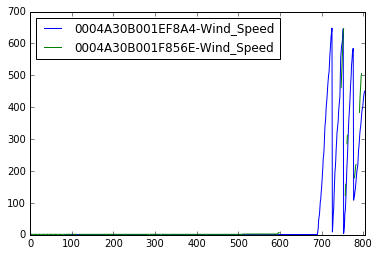

In [13]:
# Vypada to velmi podezrele, ze maximalni rychlost vetru je skoro 646km/h
# Takze si zkusim udelat nejake grafy - opet je zkopiruju ze simulace

data_wind[['0004A30B001EF8A4-Wind_Speed', '0004A30B001F856E-Wind_Speed']].plot()
plt.show()

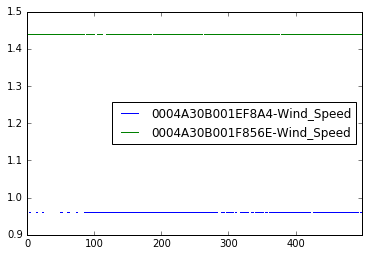

In [15]:
# Podle grafu to vypada, ze ty senzory z pocatku fungovaly dobre
# Jen se potom nejak rozbily
# Mame 2 moznosti, jak to opravit. 
# Prvni je, ze urizneme konec dat. Opet pouziji prikazy ze simulace

data_wind[['0004A30B001EF8A4-Wind_Speed', '0004A30B001F856E-Wind_Speed']][0:500].plot()
plt.show()

In [16]:
data_wind[['0004A30B001EF8A4-Wind_Speed', '0004A30B001F856E-Wind_Speed']][0:500].describe()

,0004A30B001EF8A4-Wind_Speed,0004A30B001F856E-Wind_Speed
count,4.190000e+02,479.00
mean,9.600000e-01,1.44
std,2.223100e-16,0.00
min,9.600000e-01,1.44
25%,9.600000e-01,1.44
50%,9.600000e-01,1.44
75%,9.600000e-01,1.44
max,9.600000e-01,1.44


In [17]:
# Tim nase analyza skoncila :/
# Jeste ale mame 2. soubor s udaji o vetru :)

data_raw = pd.read_csv('anemometr_json_v2.csv')

In [18]:
# Misto kopirovani prikazu jsem mohl pouze upravit prikazy, ktere jsem zadal
# To je velka vyhoda programovani v porovnani s manualnim klikanim v Google Sheetu/Libre Officu/MS Officu
# velice rychle muzu zopakovat akce, ktere chci provezt s daty


# podivam se, jake sloupce jsou dostupne
data_raw.columns

Index(['TS', 'TS_H', '0004A30B001EF8A4-Timestamp', '0004A30B001EF8A4-ack',
       '0004A30B001EF8A4-bat', '0004A30B001EF8A4-cmd', '0004A30B001EF8A4-data',
       '0004A30B001EF8A4-dr', '0004A30B001EF8A4-fcnt', '0004A30B001EF8A4-freq',
       '0004A30B001EF8A4-gws-gweui', '0004A30B001EF8A4-gws-lat',
       '0004A30B001EF8A4-gws-lon', '0004A30B001EF8A4-gws-rssi',
       '0004A30B001EF8A4-gws-snr', '0004A30B001EF8A4-gws-time',
       '0004A30B001EF8A4-gws-ts', '0004A30B001EF8A4-port',
       '0004A30B001EF8A4-seqno', '0004A30B001EF8A4-toa', '0004A30B001EF8A4-ts',
       '0004A30B001F856E-Timestamp', '0004A30B001F856E-ack',
       '0004A30B001F856E-bat', '0004A30B001F856E-cmd', '0004A30B001F856E-data',
       '0004A30B001F856E-dr', '0004A30B001F856E-fcnt', '0004A30B001F856E-freq',
       '0004A30B001F856E-gws-gweui', '0004A30B001F856E-gws-lat',
       '0004A30B001F856E-gws-lon', '0004A30B001F856E-gws-rssi',
       '0004A30B001F856E-gws-snr', '0004A30B001F856E-gws-time',
       '0004A30B001

In [19]:
# Z nazvy sloupecku je tezke urcit na prvni pohled, ve kterem sloupecku je rychlost vetru
# Proto se rychle podivame na jejich hodnoty
data_raw.describe()

,TS,0004A30B001EF8A4-bat,0004A30B001EF8A4-fcnt,0004A30B001EF8A4-freq,0004A30B001EF8A4-gws-lat,0004A30B001EF8A4-gws-lon,0004A30B001EF8A4-gws-rssi,0004A30B001EF8A4-gws-snr,0004A30B001EF8A4-gws-ts,0004A30B001EF8A4-port,...,0004A30B001F856E-bat,0004A30B001F856E-fcnt,0004A30B001F856E-gws-lat,0004A30B001F856E-gws-rssi,0004A30B001F856E-gws-snr,0004A30B001F856E-gws-ts,0004A30B001F856E-port,0004A30B001F856E-seqno,0004A30B001F856E-ts,TS.1
count,1.023000e+03,939.0,939.000000,9.390000e+02,939.000000,939.000000,939.000000,939.000000,9.390000e+02,939.0,...,680.0,680.000000,680.000000,680.000000,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,6.800000e+02,1.023000e+03
mean,1.510243e+09,255.0,2573.319489,8.679202e+08,49.802749,18.064323,-117.086262,-8.524601,1.510283e+12,1.0,...,255.0,1335.123529,49.767445,-117.028676,2.220155e+09,1.507841e+12,1.275736e+06,2.399217e+05,1.510061e+12,1.510243e+09
std,4.862449e+05,0.0,1537.330570,4.616365e+05,0.093489,0.792393,4.989756,5.707408,4.851135e+08,0.0,...,0.0,761.786018,1.366474,6.082483,5.789457e+10,5.790945e+10,3.326711e+07,2.063487e+05,3.783223e+08,4.862449e+05
min,1.509632e+09,255.0,456.000000,8.671000e+08,49.009207,14.319872,-127.000000,-20.200000,1.509633e+12,1.0,...,255.0,9.000000,14.352220,-126.000000,-2.050000e+01,5.005041e+01,1.000000e+00,1.107200e+04,1.509634e+12,1.509632e+09
25%,1.509866e+09,255.0,1352.000000,8.675000e+08,49.775864,17.830896,-120.000000,-12.350000,1.509898e+12,1.0,...,255.0,787.250000,49.775864,-120.000000,-1.680000e+01,1.509800e+12,1.000000e+00,9.910600e+04,1.509800e+12,1.509866e+09
50%,1.510134e+09,255.0,2219.000000,8.681000e+08,49.828113,18.278884,-119.000000,-9.000000,1.510170e+12,1.0,...,255.0,1321.000000,49.828113,-119.000000,-1.235000e+01,1.509959e+12,1.000000e+00,1.850015e+05,1.509959e+12,1.510134e+09
75%,1.510403e+09,255.0,3209.500000,8.683000e+08,49.845054,18.446858,-116.000000,-4.000000,1.510482e+12,1.0,...,255.0,1950.500000,49.845054,-115.000000,-8.200000e+00,1.510153e+12,1.000000e+00,2.875695e+05,1.510153e+12,1.510403e+09
max,1.511429e+09,255.0,6196.000000,8.685000e+08,50.080979,18.565105,-84.000000,11.800000,1.511429e+12,1.0,...,255.0,3271.000000,50.263794,-13.500000,1.509706e+12,1.511429e+12,8.675000e+08,1.017092e+06,1.511429e+12,1.511429e+09


In [24]:
# Ony jsou nektere sloupecky skryte, proto vyrobime smycku a vypiseme vsechny
for col in data_raw.columns:
    print("Column: ", col)
    print(data_raw[col].describe())
    print("-" * 30)
    print()

Column:  TS
count    1.023000e+03
mean     1.510243e+09
std      4.862449e+05
min      1.509632e+09
25%      1.509866e+09
50%      1.510134e+09
75%      1.510403e+09
max      1.511429e+09
Name: TS, dtype: float64
------------------------------

Column:  TS_H
count                    1023
unique                   1023
top       2017-11-22 09:15:00
freq                        1
Name: TS_H, dtype: object
------------------------------

Column:  0004A30B001EF8A4-Timestamp
count                               939
unique                              939
top       2017-11-05T01:40:09.869+01:00
freq                                  1
Name: 0004A30B001EF8A4-Timestamp, dtype: object
------------------------------

Column:  0004A30B001EF8A4-ack
count       939
unique        2
top       False
freq        932
Name: 0004A30B001EF8A4-ack, dtype: object
------------------------------

Column:  0004A30B001EF8A4-bat
count    939.0
mean     255.0
std        0.0
min      255.0
25%      255.0
50%      255.0

In [25]:
# Tak ani 2. soubor neobsahuje zadna uzitecna data
# Tim nase analyza skoncila